<a href="https://colab.research.google.com/github/jinhuioh/hi_ai_himedia/blob/master/%EC%87%BC%ED%95%91%EB%AA%B0%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%98%91%EC%97%85%ED%95%84%ED%84%B0%EB%A7%81_%EC%9C%A0%EC%82%AC%EB%8F%84_%EC%B8%A1%EC%A0%95(%ED%94%BC%EB%B2%97%ED%85%8C%EC%9D%B4%EB%B8%94%2C_%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import mlxtend #apiori알고리즘 관련 라이브러리
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from mlxtend.preprocessing import TransactionEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
#코렙한글쓰기.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 ###설치!!!런타임 재시작시 지우고 실행시켜야 합니다.
#!apt -qq -y install fonts-nanum

In [3]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [4]:
#fm._rebuild()# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

In [44]:
df = pd.read_excel('/content/추천시스템분석데이터(협업,컨텐츠).xlsx')

In [45]:
df

,info_idx,product_idx,payment_method,user_id,payment_total,recipient_info,recipient_addr,purchase_product,purchase_quantity,payment_date
0,2,3,신용카드,aaaaaa1234,49900,jinhui99,서울시 용산구,핀턱 셔츠 롱 원피스 레이온블랙 MDOP043RNBLACK,3,2022-04-19 23:29:35
1,3,4,무통장입금,aaaaaa1234,49900,addr,서울시 용산구,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙],3,2022-04-19 23:29:37
2,4,5,무통장입금,aaaaaa1234,49900,user1,경기도 군포,[쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비],4,2022-04-19 23:44:11
3,5,6,신용카드,admin,49900,rtavnerlu,경기도 부천,라이 맥시 롱 원피스 black[블랙],5,2022-04-19 23:48:22
4,6,7,신용카드,admin,49900,ddisbreyfy,서울시 왕십리,여성 트위스트 셔츠 원피스 - 에스프레소 / DR254LF588495,3,2022-04-20 23:32:38
...,...,...,...,...,...,...,...,...,...,...
796,798,310,무통장입금,admin,49900,mmorey84,521 Roth Parkway,(W) CGC 루즈핏 피케 원피스 네이비,3,2022-04-19 23:48:22
797,799,311,신용카드,admin,49900,pturoneft,7 Amoth Alley,블랙 골지 슬림핏 롱 원피스 (112571AC15),3,2022-04-20 23:32:38
798,800,311,신용카드,admin,49900,rkeydena4,0908 Comanche Drive,클래식 타이트 서머 드레스 - 블랙 / HC2039,5,2022-04-20 23:33:57
799,801,311,신용카드,cncomchinaTreeflex,49900,fcovottilp,92 Eagle Crest Street,빅 카라 트위드 자켓 드레스 (퍼플),4,2022-04-20 23:44:56


In [46]:
df.columns

Index(['info_idx', 'product_idx', 'payment_method', 'user_id', 'payment_total',
       'recipient_info', 'recipient_addr', 'purchase_product',
       'purchase_quantity', 'payment_date'],
      dtype='object')

In [47]:
df.drop(columns=['info_idx','product_idx','payment_method','payment_total','recipient_info','recipient_addr','payment_date'],inplace=True)
df.head()

,user_id,purchase_product,purchase_quantity
0,aaaaaa1234,핀턱 셔츠 롱 원피스 레이온블랙 MDOP043RNBLACK,3
1,aaaaaa1234,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙],3
2,aaaaaa1234,[쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비],4
3,admin,라이 맥시 롱 원피스 black[블랙],5
4,admin,여성 트위스트 셔츠 원피스 - 에스프레소 / DR254LF588495,3


In [48]:
df.head()

,user_id,purchase_product,purchase_quantity
0,aaaaaa1234,핀턱 셔츠 롱 원피스 레이온블랙 MDOP043RNBLACK,3
1,aaaaaa1234,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙],3
2,aaaaaa1234,[쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비],4
3,admin,라이 맥시 롱 원피스 black[블랙],5
4,admin,여성 트위스트 셔츠 원피스 - 에스프레소 / DR254LF588495,3


In [49]:
df['purchase_product']

0            핀턱 셔츠 롱 원피스 레이온블랙 MDOP043RNBLACK
1                   [쿨탠다드] 우먼즈 피케 폴로 원피스 [블랙]
2                  [쿨탠다드] 우먼즈 피케 폴로 원피스 [네이비]
3                       라이 맥시 롱 원피스 black[블랙]
4      여성 트위스트 셔츠 원피스 - 에스프레소 / DR254LF588495
                        ...                  
796                    (W) CGC 루즈핏 피케 원피스 네이비
797              블랙 골지 슬림핏 롱 원피스 (112571AC15)
798              클래식 타이트 서머 드레스 - 블랙 / HC2039
799                      빅 카라 트위드 자켓 드레스 (퍼플)
800             [쿨탠다드] 우먼즈 피케 폴로 원피스 [블루 그레이]
Name: purchase_product, Length: 801, dtype: object

# 피벗테이블을 이용하여 df를 추천시스템에 적용 할 수 있도록 바꿔보자.

In [50]:
df = df.pivot_table('purchase_quantity', index='user_id', columns='purchase_product')
df

purchase_product,[쿨탠다드] 피케 폴로 셔츠 [블랙],(W) CGC 루즈핏 피케 원피스 네이비,FLOWERMARDI_IVORY NAVY,WOMEN 쿨링 여름 코튼 데일리 미니원피스 [BLACK] 무지 ver.,WOMEN 쿨링 여름 코튼 데일리 미니원피스 [WHITE] 무지 ver.,[윔블던 에디션] 윔블던 피케 숏 슬리브 폴로 드레스 - 화이트,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블루 그레이],네이비 플라워 캉캉 미니 원피스 (322571CY2R),린넨 이지 롱 원피스,베이직 피케카라 원피스_SPOMC24G04,...,헤비오버핏 램스울 가디건 챠콜,헤비웨이트 오버사이즈 스웨트셔츠 [블랙],헤비웨이트 오버사이즈 후디드 스웨트셔츠 [미디엄 그레이],헤비웨이트 오버사이즈 후디드 스웨트셔츠 [블랙],화란 세미오버 가디건 버터,화란 세미오버 가디건 블랙,화란 세미오버 가디건 클라우드 그레이,화란 세미오버 가디건 펑키블루,후디드 스웨트셔츠 [멜란지 그레이],후디드 스웨트셔츠 [블랙]
user_id,,,,,,,,,,,,,,,,,,,,,
aaaaaa1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admin,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aed111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
esgoogleAndalax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
esgoogleNamfix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
esgoogleViva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.info

<bound method DataFrame.info of purchase_product     [쿨탠다드] 피케 폴로 셔츠 [블랙]   (W) CGC 루즈핏 피케 원피스 네이비  \
user_id                                                              
aaaaaa1234                            NaN                      NaN   
ad123                                 NaN                      NaN   
addr                                  NaN                      NaN   
admin                                 NaN                      3.0   
aed111                                NaN                      NaN   
...                                   ...                      ...   
esgoogleAndalax                       NaN                      NaN   
esgoogleNamfix                        NaN                      NaN   
esgoogleViva                          NaN                      NaN   
esgoogleYSolowarm                     NaN                      NaN   
eueuropaTresZap                       NaN                      NaN   

purchase_product    FLOWERMARDI_IVORY NAVY  \
user_id    

In [52]:
df.fillna(0, inplace=True)
df.head()

purchase_product,[쿨탠다드] 피케 폴로 셔츠 [블랙],(W) CGC 루즈핏 피케 원피스 네이비,FLOWERMARDI_IVORY NAVY,WOMEN 쿨링 여름 코튼 데일리 미니원피스 [BLACK] 무지 ver.,WOMEN 쿨링 여름 코튼 데일리 미니원피스 [WHITE] 무지 ver.,[윔블던 에디션] 윔블던 피케 숏 슬리브 폴로 드레스 - 화이트,[쿨탠다드] 우먼즈 피케 폴로 원피스 [블루 그레이],네이비 플라워 캉캉 미니 원피스 (322571CY2R),린넨 이지 롱 원피스,베이직 피케카라 원피스_SPOMC24G04,...,헤비오버핏 램스울 가디건 챠콜,헤비웨이트 오버사이즈 스웨트셔츠 [블랙],헤비웨이트 오버사이즈 후디드 스웨트셔츠 [미디엄 그레이],헤비웨이트 오버사이즈 후디드 스웨트셔츠 [블랙],화란 세미오버 가디건 버터,화란 세미오버 가디건 블랙,화란 세미오버 가디건 클라우드 그레이,화란 세미오버 가디건 펑키블루,후디드 스웨트셔츠 [멜란지 그레이],후디드 스웨트셔츠 [블랙]
user_id,,,,,,,,,,,,,,,,,,,,,
aaaaaa1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
addr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
admin,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aed111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
te = TransactionEncoder()

# 코사인유사도로 유사도를 구해보자.

In [54]:
df_cos = cosine_similarity(df)
df_cos

array([[1.        , 0.19127301, 0.21640071, ..., 0.        , 0.        ,
        0.        ],
       [0.19127301, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21640071, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [55]:
df_item_based = pd.DataFrame(data =df_cos, index = df.index, columns= df.index)
df_item_based

user_id,aaaaaa1234,ad123,addr,admin,aed111,aucomgoogleFintone,aucomgooglePannier,aucomgoogleStim,aucomsmhFlexidy,augovnswBamity,...,eduwashingtonBytecard,eduwashingtonOtcom,eduwashingtonPannier,eduwashingtonSonsing,eduyaleCardguard,esgoogleAndalax,esgoogleNamfix,esgoogleViva,esgoogleYSolowarm,eueuropaTresZap
user_id,,,,,,,,,,,,,,,,,,,,,
aaaaaa1234,1.000000,0.191273,0.216401,0.092781,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ad123,0.191273,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
addr,0.216401,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
admin,0.092781,0.000000,0.000000,1.000000,0.334795,0.205798,0.227155,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aed111,0.000000,0.000000,0.000000,0.334795,1.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
esgoogleAndalax,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
esgoogleNamfix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
esgoogleViva,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
from mlxtend.frequent_patterns import apriori

In [65]:
apriori(df_item_based, min_support=0.5, use_colnames=False)

ValueError: ignored

# 함수를 만들어서 유사도가 높은 아이디를 추출해보자.

In [78]:
#함수를 만들어서 유사도가 높은 아이디를 추출해보자.
def get_item_based(title):
  return df_item_based[title].sort_values(ascending=False)[:6]


In [79]:
get_item_based('ad123')

user_id
ad123                 1.000000
comdropboxJob         0.707107
aaaaaa1234            0.191273
esgoogleViva          0.000000
composterousSonair    0.000000
comoakleyIt           0.000000
Name: ad123, dtype: float64

In [80]:
type(get_item_based('ad123'))

pandas.core.series.Series

In [81]:
get_item_based('admin')

user_id
admin                 1.000000
comdropboxSonair      0.428746
aed111                0.334795
cncomchinaRank        0.267836
chadminLatlux         0.230089
aucomgooglePannier    0.227155
Name: admin, dtype: float64

# 검색한 아이디와 유사한 유저 상위5개를 그래프로 그려보자.

In [82]:
get_item_based = get_item_based('admin')[1:6]
get_item_based.index

Index(['comdropboxSonair', 'aed111', 'cncomchinaRank', 'chadminLatlux',
       'aucomgooglePannier'],
      dtype='object', name='user_id')

In [83]:
get_item_based 

user_id
comdropboxSonair      0.428746
aed111                0.334795
cncomchinaRank        0.267836
chadminLatlux         0.230089
aucomgooglePannier    0.227155
Name: admin, dtype: float64

In [89]:
get_item_based[:1]

user_id
comdropboxSonair    0.428746
Name: admin, dtype: float64

In [100]:
label = get_item_based.index
index = np.arange(len(label))

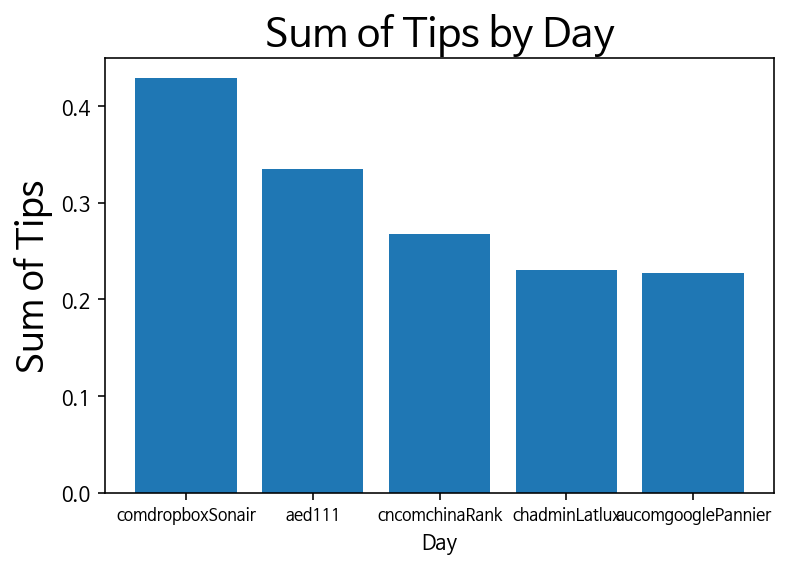

<Figure size 1440x1440 with 0 Axes>

In [109]:
%matplotlib inline
plt.bar(index, get_item_based)
plt.title('Sum of Tips by Day', fontsize=20)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Sum of Tips', fontsize=18)
plt.xticks(index, label, fontsize=8)
plt.figure(figsize=(20,20))
plt.show()

In [59]:
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import rc